# Proyecto Analisis de Datos - Analisis

### Modelo de _Forecast_ de flujo de clientes en una empresa en Chile

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import researchpy as rp
import scipy.stats as stats
from scipy.stats import f_oneway
import seaborn
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from Funciones.Funciones_feriados_semana import Feriado, Diaantesdeferiado, semana_del_mes
pd.options.mode.chained_assignment = None  # default='warn'

In [50]:
df_arima=pd.read_csv('Data/processed/datos_modelo.csv')
df_arima= df_arima[:-71]

### Media Movil 

**Evaluaremos la Media movil de la serie de tiempo y la desviacion estandar para un intervalod e tiempo de 7 dias que considere una intervalo movil de los ultimos 6 periodos y lo compararemos con la serie de tiempo original. Para que pueda ser visible en el gráfico eligiremos la segunda semana de enero de 2022**

In [51]:
df_arima_enero=df_arima[270:408]
df_arima_enero

,datetime,Cantidad
270,2022-01-12 06:00:00,0
271,2022-01-12 07:00:00,0
272,2022-01-12 08:00:00,0
273,2022-01-12 09:00:00,0
274,2022-01-12 10:00:00,0
...,...,...
403,2022-01-17 19:00:00,106
404,2022-01-17 20:00:00,94
405,2022-01-17 21:00:00,105
406,2022-01-17 22:00:00,130


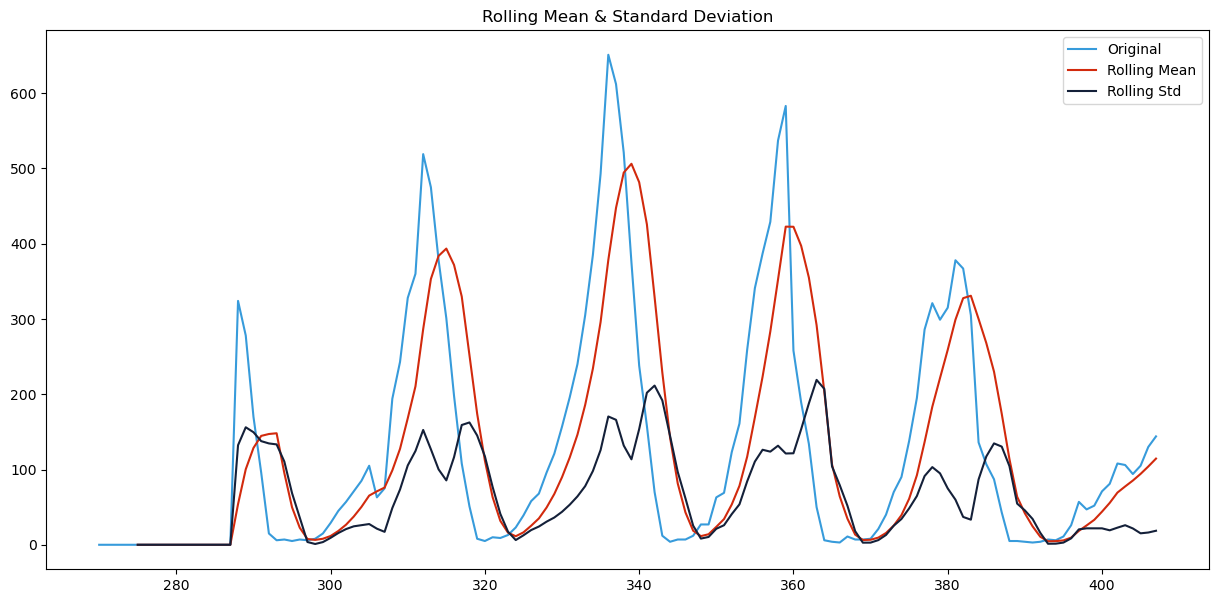

In [52]:
df_arima_enero["rolling_avg"] = df_arima_enero["Cantidad"].rolling(window=6).mean() 
df_arima_enero["rolling_std"] = df_arima_enero["Cantidad"].rolling(window=6).std()


plt.figure(figsize=(15,7))
plt.plot(df_arima_enero["Cantidad"], color='#379BDB', label='Original')
plt.plot(df_arima_enero["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(df_arima_enero["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

**Llevamos el Dataframe al formato que será aceptado por la libreria de ARIMA, esto es un array con solo 1 valor y en el indice debe estar el datetime con timestamp**

In [53]:
df_arima.index=df_arima['datetime']
df_arima=df_arima.drop(['datetime'],axis=1)
array_arima=df_arima['Cantidad']
array_arima


datetime
2022-01-01 00:00:00    620
2022-01-01 01:00:00    566
2022-01-01 02:00:00    472
2022-01-01 03:00:00    369
2022-01-01 04:00:00    247
                      ... 
2022-09-07 20:00:00    284
2022-09-07 21:00:00    287
2022-09-07 22:00:00    338
2022-09-07 23:00:00    483
2022-09-08 00:00:00    158
Name: Cantidad, Length: 6001, dtype: int64

### Train Test Serie de Tiempo

**Realizamos Split Train y Test**

In [54]:
Truth=array_arima[-24:]
Truth[22]=350
Truth

datetime
2022-09-07 01:00:00    414
2022-09-07 02:00:00    332
2022-09-07 03:00:00    231
2022-09-07 04:00:00    134
2022-09-07 05:00:00     71
2022-09-07 06:00:00     41
2022-09-07 07:00:00     12
2022-09-07 08:00:00      0
2022-09-07 09:00:00      0
2022-09-07 10:00:00      0
2022-09-07 11:00:00     15
2022-09-07 12:00:00     34
2022-09-07 13:00:00     67
2022-09-07 14:00:00     55
2022-09-07 15:00:00     65
2022-09-07 16:00:00    151
2022-09-07 17:00:00    188
2022-09-07 18:00:00    229
2022-09-07 19:00:00    261
2022-09-07 20:00:00    284
2022-09-07 21:00:00    287
2022-09-07 22:00:00    338
2022-09-07 23:00:00    350
2022-09-08 00:00:00    158
Name: Cantidad, dtype: int64

In [55]:
Train=array_arima[:-24]
Train

datetime
2022-01-01 00:00:00    620
2022-01-01 01:00:00    566
2022-01-01 02:00:00    472
2022-01-01 03:00:00    369
2022-01-01 04:00:00    247
                      ... 
2022-09-06 20:00:00    168
2022-09-06 21:00:00    220
2022-09-06 22:00:00    283
2022-09-06 23:00:00    261
2022-09-07 00:00:00    421
Name: Cantidad, Length: 5977, dtype: int64

### Forecast - Modelo ARIMA

**Importamos librerias de ARIMA**

In [8]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import warnings

**Entrenamos el Modelo**

**Solo al probar algunas combinaciones y saber previamente que el ciclo natural de cada dia es de cada 24 horas, partiremos con parametro de media movil de 24 y solo los ultimos 2 componentes autoregresivos, o autoregresivo de segundo orden**

In [9]:
from datetime import datetime
start_time = datetime.now()
model1 = ARIMA(Train, order=(2, 0, 24))
model_fit1 = model1.fit()
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


                   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check

Duration: 0:02:41.317248


**Vemos que el tiempo de ejecución es de 2 minuto y 23 segundos lo cual es bastante alto por lo que hacer manualmente un grid search de combinatoria de AR:24 x I:2 x MA:24 daria un total de 1152 registros lo que implicaria 4,2 dias de procesamiento, asumiendo linealidad**

In [10]:
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:               Cantidad   No. Observations:                 5977
Model:                ARIMA(2, 0, 24)   Log Likelihood              -33719.976
Date:                Tue, 30 May 2023   AIC                          67495.952
Time:                        16:37:49   BIC                          67683.431
Sample:                    01-01-2022   HQIC                         67561.070
                         - 09-07-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.7234      8.330     13.773      0.000      98.397     131.049
ar.L1          1.8506      0.016    113.459      0.000       1.819       1.883
ar.L2         -0.9201      0.015    -63.055      0.0

**Predecimos para los siguentes 24 registros**

In [11]:
Predition1 = model_fit1.forecast(steps=24)
Predition1 


2022-09-07 01:00:00    363.975004
2022-09-07 02:00:00    311.262084
2022-09-07 03:00:00    263.608986
2022-09-07 04:00:00    207.066276
2022-09-07 05:00:00    155.114799
2022-09-07 06:00:00    111.235288
2022-09-07 07:00:00     68.590586
2022-09-07 08:00:00     35.742137
2022-09-07 09:00:00     13.150334
2022-09-07 10:00:00      5.775859
2022-09-07 11:00:00      7.923367
2022-09-07 12:00:00     16.065682
2022-09-07 13:00:00     31.810029
2022-09-07 14:00:00     56.497019
2022-09-07 15:00:00     83.377676
2022-09-07 16:00:00    108.971791
2022-09-07 17:00:00    137.102960
2022-09-07 18:00:00    163.378224
2022-09-07 19:00:00    186.627208
2022-09-07 20:00:00    211.482899
2022-09-07 21:00:00    231.895869
2022-09-07 22:00:00    246.905599
2022-09-07 23:00:00    260.528411
2022-09-08 00:00:00    245.386882
Freq: H, Name: predicted_mean, dtype: float64

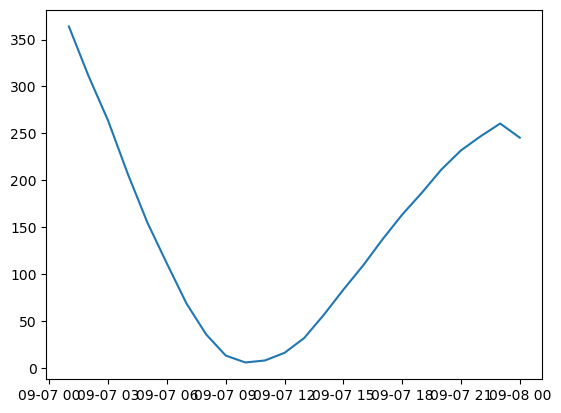

In [12]:
plt.plot(Predition1)

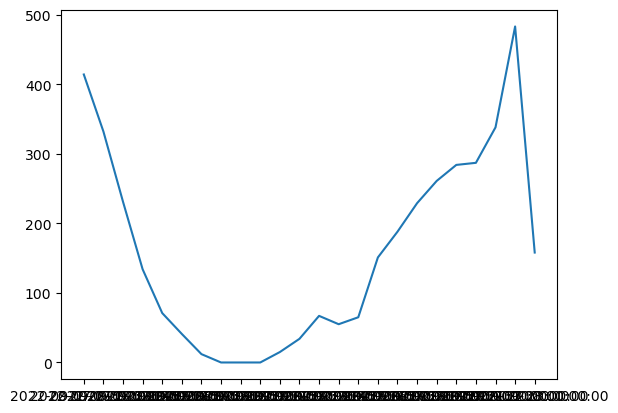

In [13]:
plt.plot(Truth)

## AUTO ARIMA

**Utilizaremos auto arima para evaluar que coeficientes p,q y d son los optimos dada la limitación de procesamiento para hacer un grid search manual**

In [14]:
import pmdarima as pm

In [15]:
ARIMA_model = pm.auto_arima(Train, 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=48, max_q=48, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

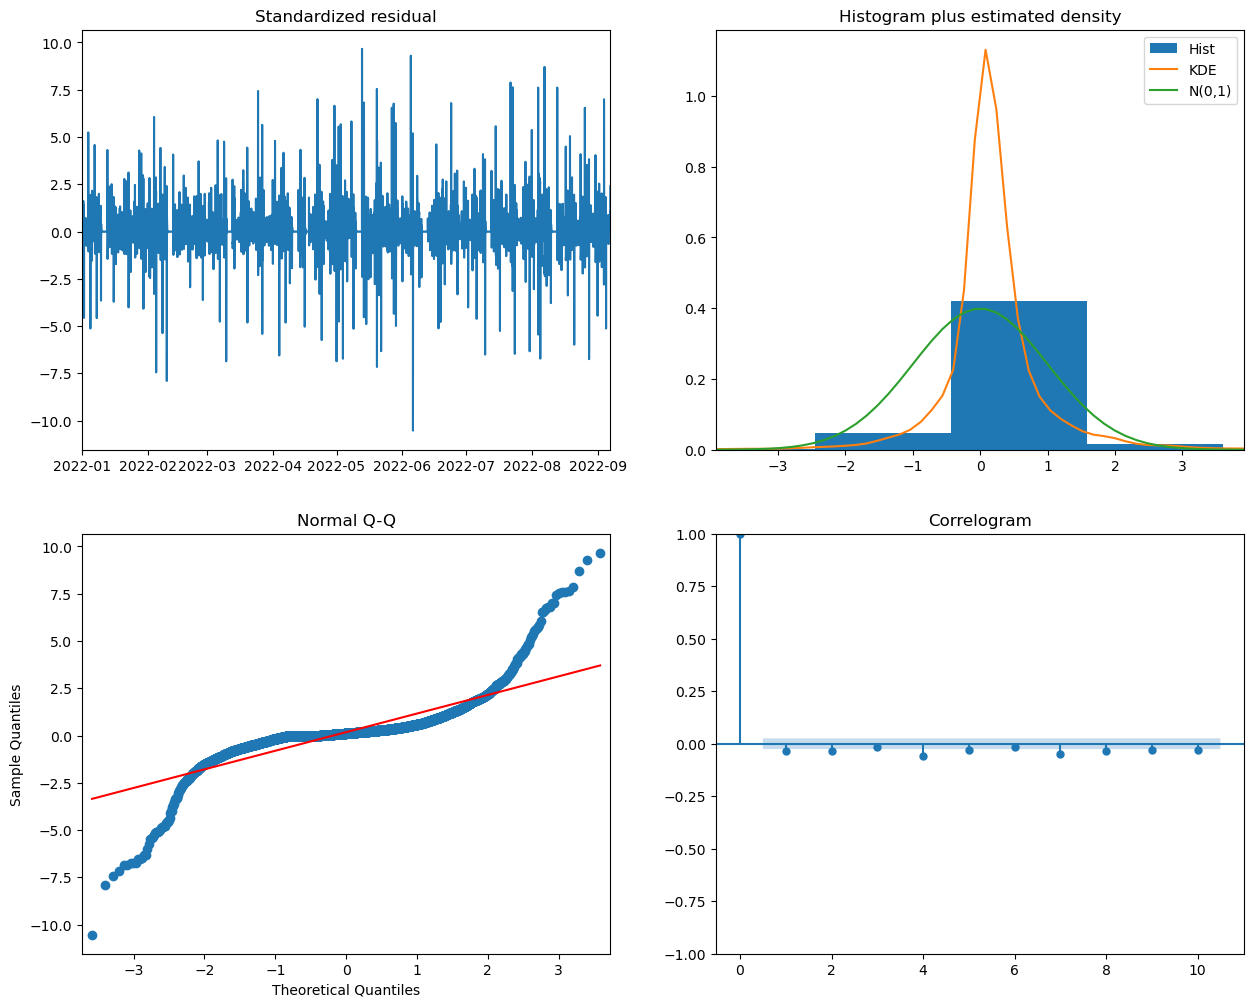

In [16]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [17]:
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5977
Model:               SARIMAX(3, 0, 2)   Log Likelihood              -34294.770
Date:                Tue, 30 May 2023   AIC                          68601.540
Time:                        16:38:12   BIC                          68641.714
Sample:                    01-01-2022   HQIC                         68615.494
                         - 09-07-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0544      0.239      8.583      0.000       1.585       2.523
ar.L2         -1.4478      0.457     -3.166      0.002      -2.344      -0.552
ar.L3          0.3537      0.227      1.558      0.119      -0.091       0.799
ma.L1         -1.0699      0.238     -4.489      0.000      -1.537      -0.603
ma.L2          0.4108      0.224      1.833      0.067      -0.029       0.850
sigma2      5647.8024     33.839    166.901      0.000    5581.479    5714.126
===================================================================================
Ljung-Box (L1) (Q):                   7.53   Jarque-Bera (JB):            130791.30
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.45   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**El modelo optimo arrojado por autoarima es de orden (3, 0, 2) lo que significa que solo sería un autoregresivo de orden 3, es decir que el valor anterior está basado en los ultimos 3 registros. Esto es interesante porque una ventana temporal de 12 horas (12 registros en este _dataframe_) es representativa para los datos analizados de esta manera.**

**Por otro lado, el análisis fue realizado con el parámetro _max_q=48_, por lo que solo incorpora como variables los últimos 48 registros para entrenar y predecir. Este parámetro fue fijado en función del poder de cómputo que toma este análisis, el que crece exponencialmente si es que aumentáramos a _max_q_ a un valor que incorpore registros que pudiesen reflejar otros patrones de estacionalidad que ahora no han sido considerados.**

In [18]:
model2 = ARIMA(Train, order=(3, 0, 2))  #Parametros de ARIMA
model_fit2 = model2.fit()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [19]:
Predition2 = model_fit2.forecast(steps=24)
Predition2 

2022-09-07 01:00:00    371.096523
2022-09-07 02:00:00    315.022941
2022-09-07 03:00:00    255.519923
2022-09-07 04:00:00    195.613640
2022-09-07 05:00:00    138.390343
2022-09-07 06:00:00     86.775809
2022-09-07 07:00:00     43.333797
2022-09-07 08:00:00     10.096000
2022-09-07 09:00:00    -11.566407
2022-09-07 10:00:00    -21.022587
2022-09-07 11:00:00    -18.409543
2022-09-07 12:00:00     -4.607189
2022-09-07 13:00:00     18.835690
2022-09-07 14:00:00     49.818148
2022-09-07 15:00:00     85.837394
2022-09-07 16:00:00    124.161731
2022-09-07 17:00:00    162.013949
2022-09-07 18:00:00    196.752737
2022-09-07 19:00:00    226.040107
2022-09-07 20:00:00    247.984202
2022-09-07 21:00:00    261.248717
2022-09-07 22:00:00    265.122701
2022-09-07 23:00:00    259.547257
2022-09-08 00:00:00    245.098647
Freq: H, Name: predicted_mean, dtype: float64

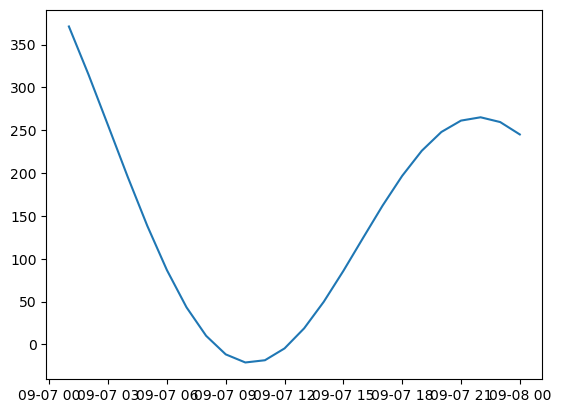

In [20]:
plt.plot(Predition2)

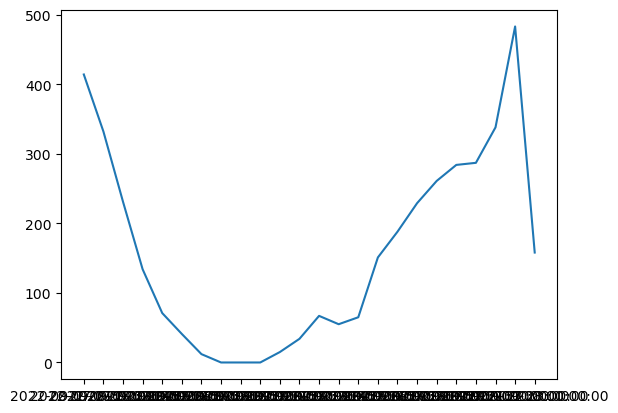

In [21]:
plt.plot(Truth)

**El modelo capta el patrón de manera correcta, solo que existe una restricción logica que implica que el numero de pronostico no puede ser menor a cero (dado que es el uso de máquinas). Por ende, agregaremos la siguente regla de negocio: que si el modelo es negativo entonces será reemplazado por el valor cero, sin embargo probaremos otros modelos que puedan capturar este efecto**

### Forecast SARIMA

In [22]:
import statsmodels.api as sm

In [23]:
model3 = sm.tsa.statespace.SARIMAX(Train, order=(3,0,2), seasonal_order=(1,0,0,24))
#                                   enforce_stationarity=False,
#                                   enforce_invertibility=False)
model_fit3 = model3.fit()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [24]:
Predition3 = model_fit3.forecast(steps=24)
Predition3.index = pd.to_datetime(Predition3.index)
Predition3

2022-09-07 01:00:00    384.294716
2022-09-07 02:00:00    347.852981
2022-09-07 03:00:00    305.296855
2022-09-07 04:00:00    260.395100
2022-09-07 05:00:00    217.325436
2022-09-07 06:00:00    176.309939
2022-09-07 07:00:00    139.694314
2022-09-07 08:00:00    108.646649
2022-09-07 09:00:00     83.371284
2022-09-07 10:00:00     63.514376
2022-09-07 11:00:00     48.545845
2022-09-07 12:00:00     38.215982
2022-09-07 13:00:00     29.875417
2022-09-07 14:00:00     24.345991
2022-09-07 15:00:00     20.069986
2022-09-07 16:00:00     18.216217
2022-09-07 17:00:00     18.387972
2022-09-07 18:00:00     17.530910
2022-09-07 19:00:00     16.547783
2022-09-07 20:00:00     17.533042
2022-09-07 21:00:00     20.477878
2022-09-07 22:00:00     24.480565
2022-09-07 23:00:00     22.170065
2022-09-08 00:00:00     33.880291
Freq: H, Name: predicted_mean, dtype: float64

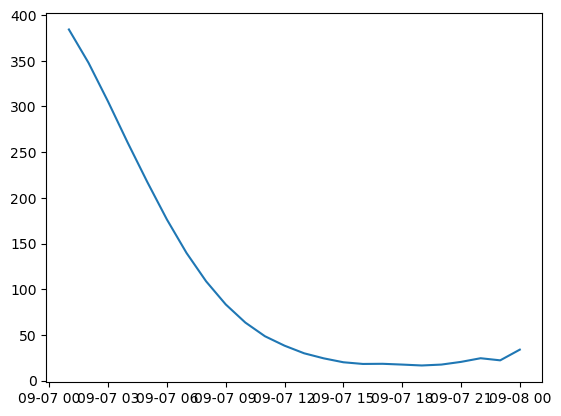

In [25]:
plt.plot(Predition3)

In [57]:
real=array_arima[-72:]
real[70]=350
real.index = pd.to_datetime(real.index)
real

datetime
2022-09-05 01:00:00    140
2022-09-05 02:00:00     96
2022-09-05 03:00:00     34
2022-09-05 04:00:00      0
2022-09-05 05:00:00      0
                      ... 
2022-09-07 20:00:00    284
2022-09-07 21:00:00    287
2022-09-07 22:00:00    338
2022-09-07 23:00:00    350
2022-09-08 00:00:00    158
Name: Cantidad, Length: 72, dtype: int64

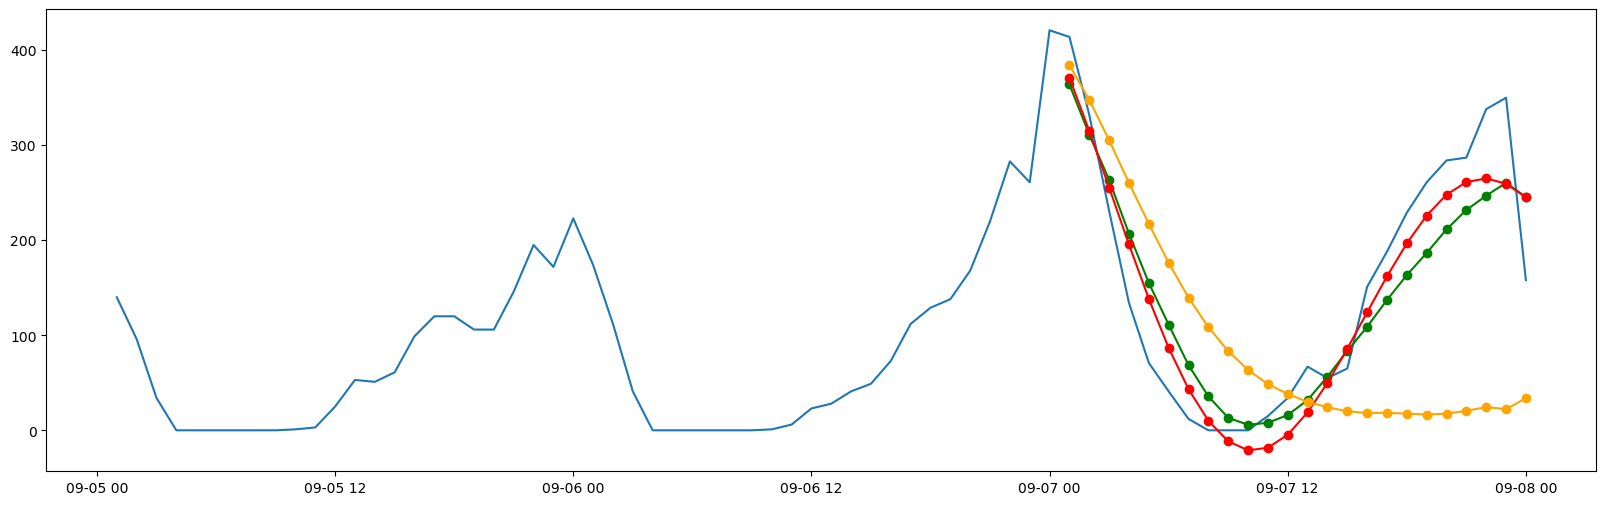

In [58]:
plt.figure(figsize=(20, 6))
plt.plot(real)
plt.plot(Predition1, color='green',marker='o')
plt.plot(Predition2, color='red',marker='o')
plt.plot(Predition3, color='orange' ,marker='o')


In [59]:
Predition_final= [0 if i < 0 else i for i in Predition1.values]
Predition_final

[363.9750044235558,
 311.2620837779668,
 263.60898554268636,
 207.06627646948047,
 155.11479858651208,
 111.23528841777868,
 68.59058595960718,
 35.74213665883407,
 13.15033441576037,
 5.775859292932864,
 7.923366624561595,
 16.06568232391345,
 31.81002913109927,
 56.49701852866882,
 83.37767583033738,
 108.97179147742267,
 137.1029598682918,
 163.37822369452306,
 186.62720765522172,
 211.48289857425337,
 231.89586911511614,
 246.90559910125717,
 260.52841081129543,
 245.38688166057298]

In [60]:
Predition_final=pd.Series(Predition_final,index=Predition1.index)
Predition_final

2022-09-07 01:00:00    363.975004
2022-09-07 02:00:00    311.262084
2022-09-07 03:00:00    263.608986
2022-09-07 04:00:00    207.066276
2022-09-07 05:00:00    155.114799
2022-09-07 06:00:00    111.235288
2022-09-07 07:00:00     68.590586
2022-09-07 08:00:00     35.742137
2022-09-07 09:00:00     13.150334
2022-09-07 10:00:00      5.775859
2022-09-07 11:00:00      7.923367
2022-09-07 12:00:00     16.065682
2022-09-07 13:00:00     31.810029
2022-09-07 14:00:00     56.497019
2022-09-07 15:00:00     83.377676
2022-09-07 16:00:00    108.971791
2022-09-07 17:00:00    137.102960
2022-09-07 18:00:00    163.378224
2022-09-07 19:00:00    186.627208
2022-09-07 20:00:00    211.482899
2022-09-07 21:00:00    231.895869
2022-09-07 22:00:00    246.905599
2022-09-07 23:00:00    260.528411
2022-09-08 00:00:00    245.386882
Freq: H, dtype: float64

Text(0.5, 1.0, 'True Values & 24 hrs Forecast')

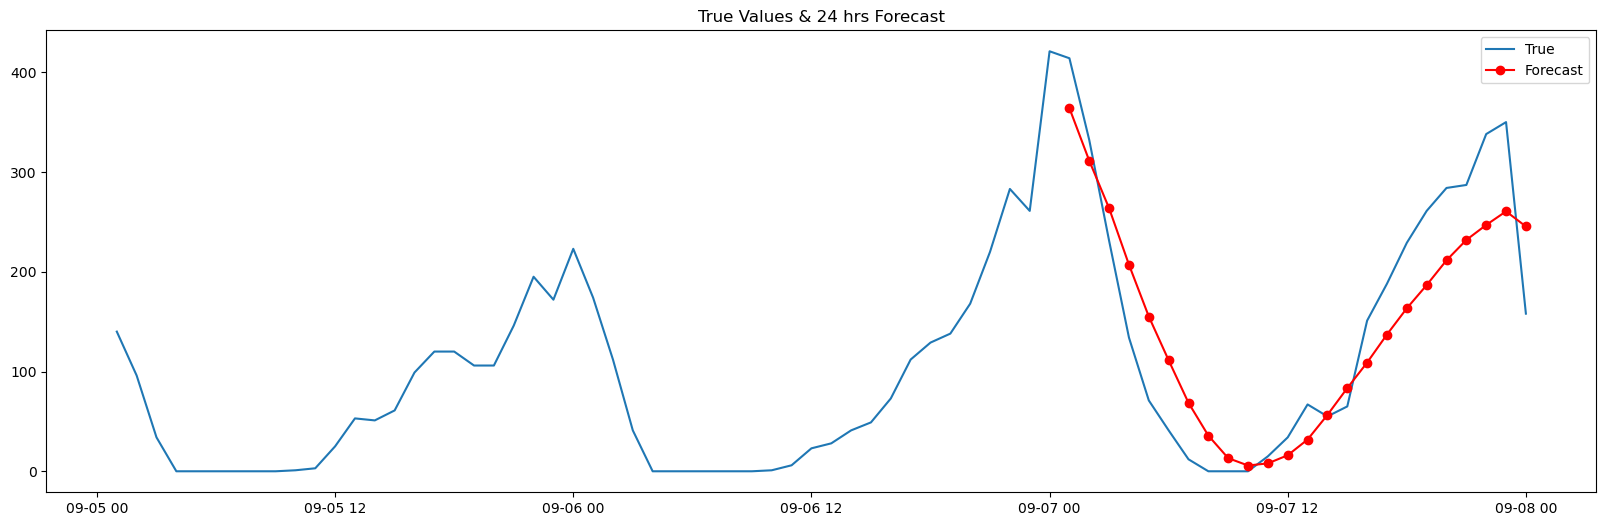

In [61]:
plt.figure(figsize=(20, 6))
plt.plot(real, label='True')
plt.plot(Predition_final, color='red',marker='o' ,label='Forecast')
plt.legend()
plt.title('True Values & 24 hrs Forecast')

### Indicadores de Desempeño

In [62]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Truth, Predition_final)
mae

47.94236311602887

In [63]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Truth, Predition_final)
mse 

3100.3595226868806

In [64]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(Truth, Predition_final)
rmse = sqrt(mse)
rmse

55.68087214373425